In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

df=pd.read_csv('/Users/evgeniapolezaeva/Downloads/powerconsumption.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52416 entries, 1/1/2017 0:00 to 12/30/2017 23:50
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             52416 non-null  float64
 1   Humidity                52416 non-null  float64
 2   WindSpeed               52416 non-null  float64
 3   GeneralDiffuseFlows     52416 non-null  float64
 4   DiffuseFlows            52416 non-null  float64
 5   PowerConsumption_Zone1  52416 non-null  float64
 6   PowerConsumption_Zone2  52416 non-null  float64
 7   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8)
memory usage: 3.6+ MB


In [24]:
# случайный лес, содержит большое кол-во деревьев, связанных между собой рандомно. В конце выдают среднее значение предсказания
# мы ему передаем параметры, а он нам выдает коэффициенты важности признаков. 
# Randomforest не работает с пропусками, поэтому используем fillna
# в x мы записываем остальные признаки 
# в y мы записываем целевые переменные 
x = df[df.columns[:-3]].fillna(-100)
y = df[df.columns[-3:]].fillna(-100)

rfr = RandomForestRegressor()
rfr.fit(x,y)

RandomForestRegressor()

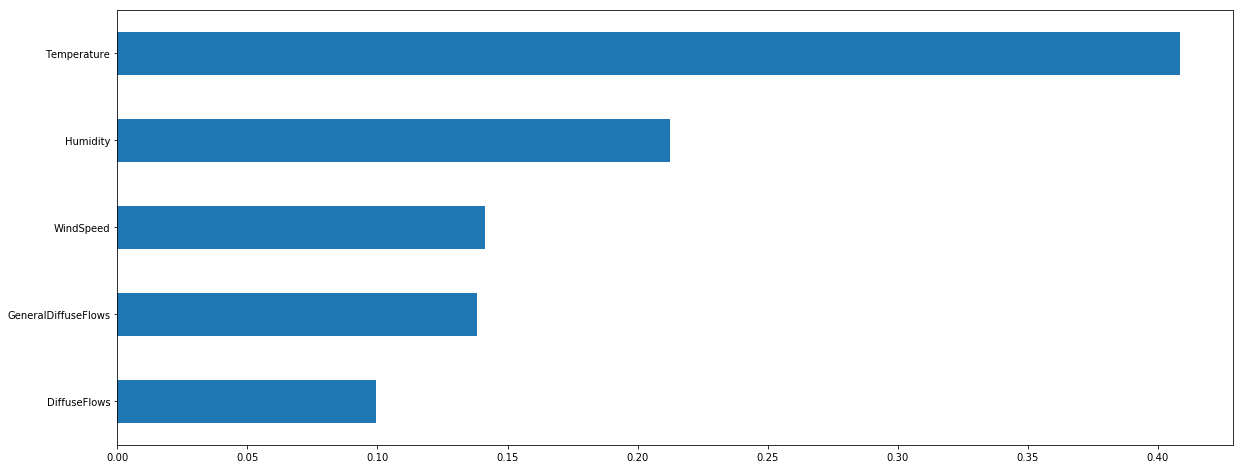

In [25]:
# Важность признаков 
# числовые значения важности каждого признака - rfr.feature_importances_
# берем все названия колонок - X.columns[0:len(X.columns)]

imp = pd.Series(rfr.feature_importances_, x.columns[0:len(x.columns)]).sort_values()
plt.figure(figsize=(20,8))
imp.plot(kind='barh')
plt.show()

In [26]:
df.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3'],
      dtype='object')

In [27]:
len(df)

52416

In [28]:
df.head() 

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


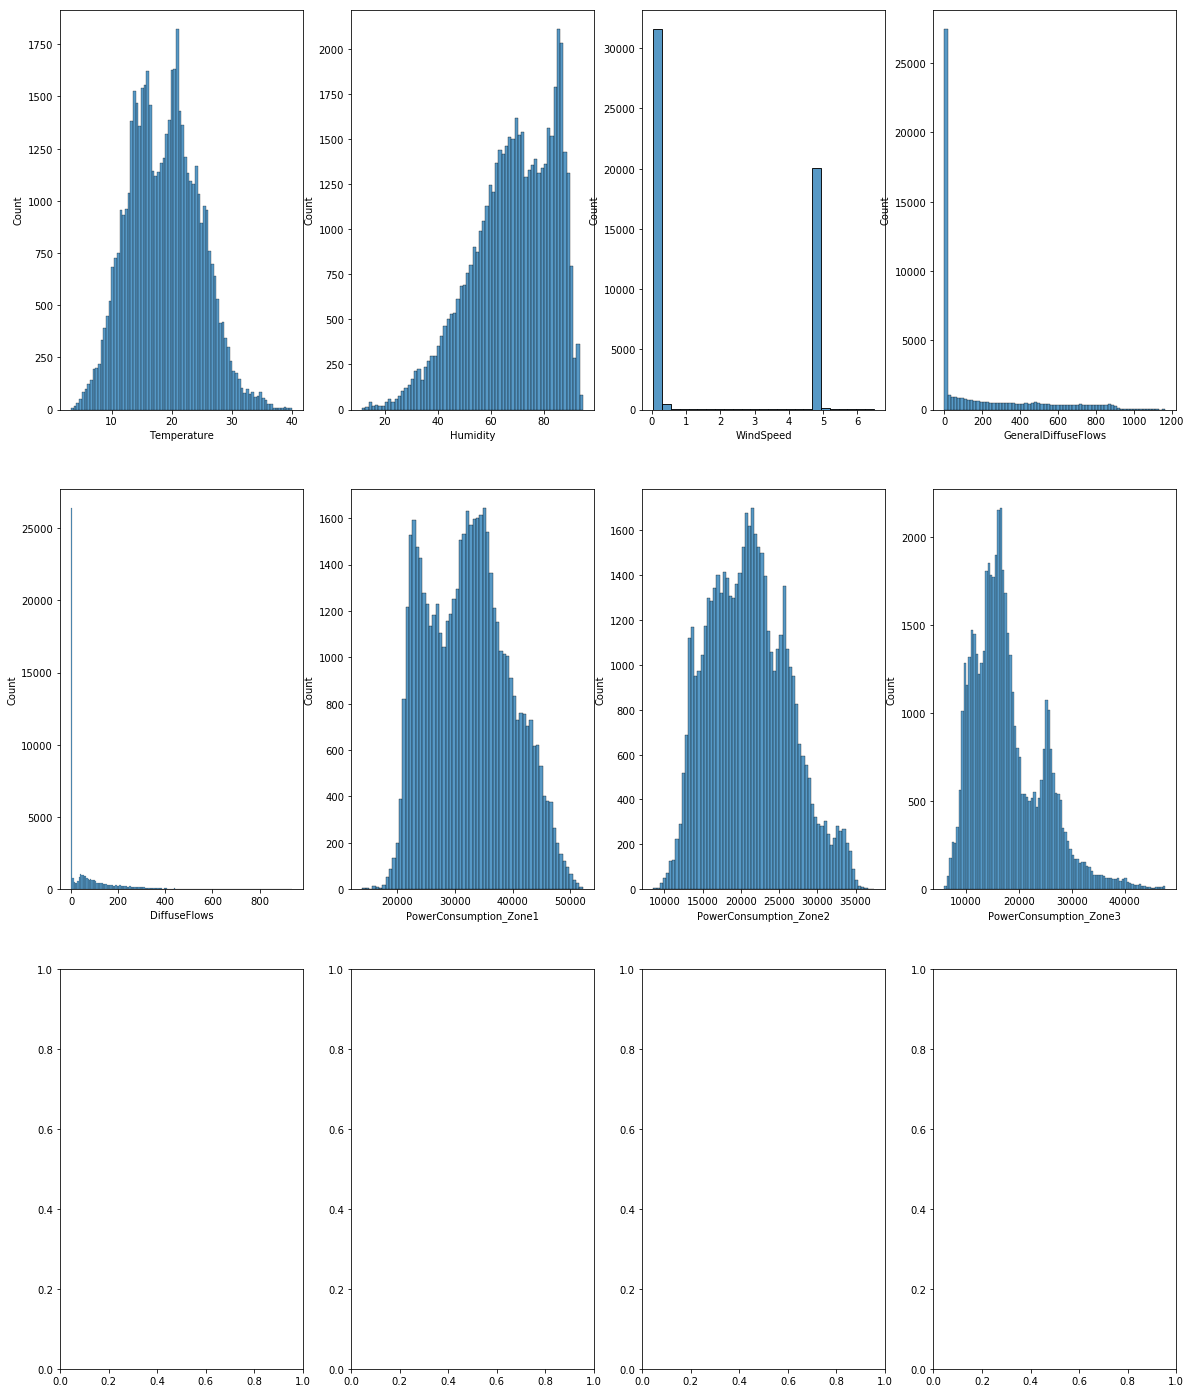

In [30]:
# графики распределения признаков главного dataframe 
figure, axes = plt.subplots(3, 4, figsize=(20,25))

i = 0 # столбцы
j = 0 # строки
for column in df.columns:
    if j == 4:
        j = 0
        i += 1
    sns.histplot(df[column], ax=axes[i, j])
    j += 1

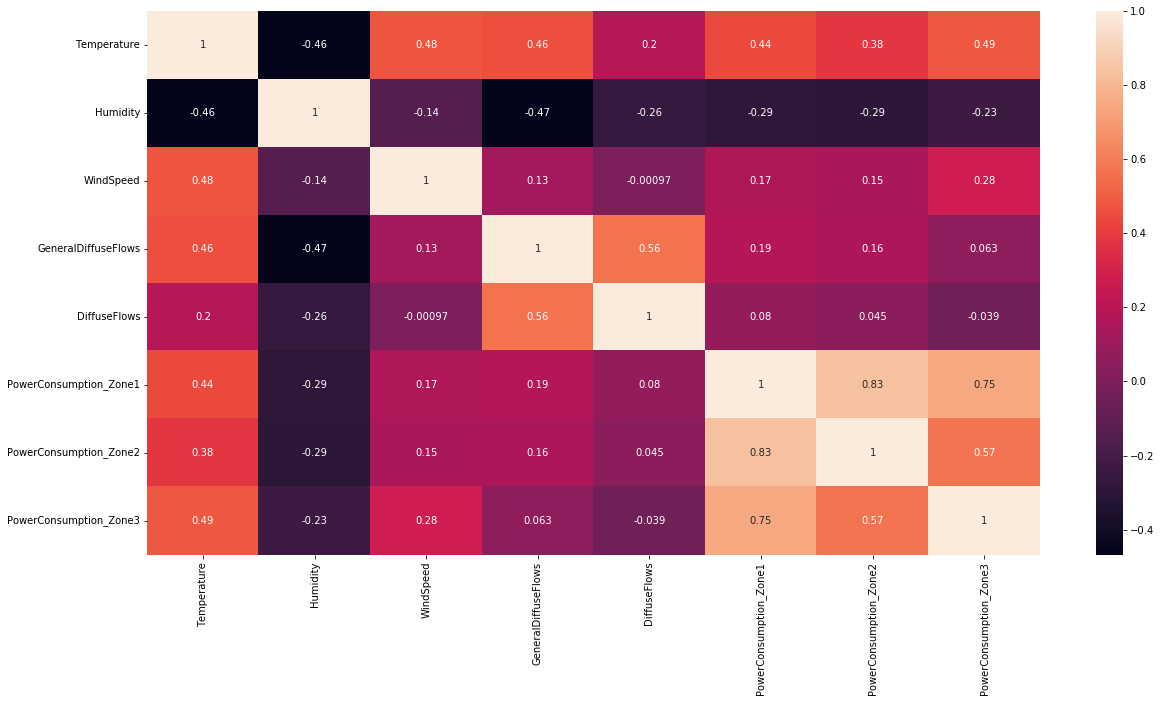

In [31]:
figure, axes = plt.subplots(figsize=(20,10))
# annot=True - отображение чисел
sns.heatmap(df.corr(), annot=True, ax=axes)
plt.show()

In [7]:
# Для каждого признака считаем элементы описательной статистики
rows_list = []
for column in df.columns:
    
    rows_list.append([column, len(df[column]), df[column].isna().sum() * 100 / len(df[column]), df[column].min(), df[column].mean(), df[column].max(), df[column].std(), df[column].nunique(), 
                                    df[column].quantile(0.25), df[column].quantile(0.5), df[column].quantile(0.75), df[column].quantile(0.25) - df[column].quantile(0.75)])
params = pd.DataFrame(rows_list, columns=['Признак', 'Количество', '% пропусков', 'Минимум', 'Среднее', 'Максимум', 'Стандартное отклонение', 
                                    'Мощность', 'Первый квартиль', 'Медиана', 'Третий квартиль', 'IQR'])
params

,Признак,Количество,% пропусков,Минимум,Среднее,Максимум,Стандартное отклонение,Мощность,Первый квартиль,Медиана,Третий квартиль,IQR
0,Temperature,52416,0.0,3.247000,18.810024,40.01000,5.815476,3437,14.410000,18.780000,22.890000,-8.480000
1,Humidity,52416,0.0,11.340000,68.259518,94.80000,15.551177,4443,58.310000,69.860000,81.400000,-23.090000
2,WindSpeed,52416,0.0,0.050000,1.959489,6.48300,2.348862,548,0.078000,0.086000,4.915000,-4.837000
3,GeneralDiffuseFlows,52416,0.0,0.004000,182.696614,1163.00000,264.400960,10504,0.062000,5.035500,319.600000,-319.538000
4,DiffuseFlows,52416,0.0,0.011000,75.028022,936.00000,124.210949,10449,0.122000,4.456000,101.000000,-100.878000
5,PowerConsumption_Zone1,52416,0.0,13895.696200,32344.970564,52204.39512,7130.562564,27709,26310.668692,32265.920340,37309.018185,-10998.349493
6,PowerConsumption_Zone2,52416,0.0,8560.081466,21042.509082,37408.86076,5201.465892,29621,16980.766032,20823.168405,24713.717520,-7732.951487
7,PowerConsumption_Zone3,52416,0.0,5935.174070,17835.406218,47598.32636,6622.165099,22838,13129.326630,16415.117470,21624.100420,-8494.773790
